In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [3]:
df1 = pd.read_csv("C:/Users/Zach/Documents/GitHub/TelecomsPredict/Data/telco_customer_churn.csv")

#BasicEDA
def check_statistical_parameters(df1):
    summary = df1.describe().T
    return summary
check_statistical_parameters(df1)


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [4]:
for col in df1.columns[1:]:  # Skip the first column
    unique_values = df1[col].unique()
    print(f"Column: {col}")
    print(f"Type :{df1[col].dtypes}")
    print(f"Unique values: {unique_values}\n")
    
df1[df1["TotalCharges"].str.contains("^\s*$", na=False)]


Column: gender
Type :object
Unique values: ['Female' 'Male']

Column: SeniorCitizen
Type :int64
Unique values: [0 1]

Column: Partner
Type :object
Unique values: ['Yes' 'No']

Column: Dependents
Type :object
Unique values: ['No' 'Yes']

Column: tenure
Type :int64
Unique values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

Column: PhoneService
Type :object
Unique values: ['No' 'Yes']

Column: MultipleLines
Type :object
Unique values: ['No phone service' 'No' 'Yes']

Column: InternetService
Type :object
Unique values: ['DSL' 'Fiber optic' 'No']

Column: OnlineSecurity
Type :object
Unique values: ['No' 'Yes' 'No internet service']

Column: OnlineBackup
Type :object
Unique values: ['Yes' 'No' 'No internet service']

Column: DeviceProtection
Type :object
Unique values: ['No' 'Yes' 'No internet service']

Column: T

<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Zach\AppData\Local\Temp\ipykernel_8580\242064683.py:7: SyntaxWarning: invalid escape sequence '\s'
  df1[df1["TotalCharges"].str.contains("^\s*$", na=False)]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [5]:
from sklearn.preprocessing import OneHotEncoder


cols_to_encode = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV',
                  'StreamingMovies','Contract','PaperlessBilling','PaymentMethod', 'Churn']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df1[cols_to_encode])
Encoded_DF = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(cols_to_encode), index=df1.index)
df1 = df1.drop(columns=cols_to_encode)
df2 = pd.concat([df1, Encoded_DF], axis=1)
print(df2.head())


   customerID  tenure  MonthlyCharges TotalCharges  gender_Female  \
0  7590-VHVEG       1           29.85        29.85            1.0   
1  5575-GNVDE      34           56.95       1889.5            0.0   
2  3668-QPYBK       2           53.85       108.15            0.0   
3  7795-CFOCW      45           42.30      1840.75            0.0   
4  9237-HQITU       2           70.70       151.65            1.0   

   gender_Male  SeniorCitizen_0  SeniorCitizen_1  Partner_No  Partner_Yes  \
0          0.0              1.0              0.0         0.0          1.0   
1          1.0              1.0              0.0         1.0          0.0   
2          1.0              1.0              0.0         1.0          0.0   
3          1.0              1.0              0.0         1.0          0.0   
4          0.0              1.0              0.0         1.0          0.0   

   ...  Contract_One year  Contract_Two year  PaperlessBilling_No  \
0  ...                0.0                0.0         

In [ ]:
#saving file

In [6]:
# Check for missing values
missing_values = df2.isnull().sum()
missing_values

customerID                                 0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
gender_Female                              0
gender_Male                                0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecu

In [7]:
#casting tenure as float
df2['tenure'] = df2['tenure'].astype(float)
df2['MonthlyCharges'] = df2['MonthlyCharges'].astype(float)
df2["TotalCharges"] = df2["TotalCharges"].replace(r"^\s*$", "0", regex=True)
df2["TotalCharges"] = df2["TotalCharges"].astype(float)  # Convert to float
# Check the data types again
print(df2.dtypes)

customerID                                  object
tenure                                     float64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Female                              float64
gender_Male                                float64
SeniorCitizen_0                            float64
SeniorCitizen_1                            float64
Partner_No                                 float64
Partner_Yes                                float64
Dependents_No                              float64
Dependents_Yes                             float64
PhoneService_No                            float64
PhoneService_Yes                           float64
MultipleLines_No                           float64
MultipleLines_No phone service             float64
MultipleLines_Yes                          float64
InternetService_DSL                        float64
InternetService_Fiber optic                float64
InternetService_No             

In [8]:
#New basic features
df2['AvgCustomerRevenuePerMonth'] = df2['TotalCharges'] / df2['tenure']
df2["TotalCustomerValue"] = df2["MonthlyCharges"] * df2["tenure"]

#summing the service binary features
service_cols_yes = ['PhoneService_Yes', 'MultipleLines_Yes', 'InternetService_DSL','InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes']
df2['Total_Yes_Services'] = df2[service_cols_yes].sum(axis=1)

# Check the new feature
print(df2[['Total_Yes_Services']].head(30))





    Total_Yes_Services
0                  2.0
1                  4.0
2                  4.0
3                  4.0
4                  2.0
5                  6.0
6                  5.0
7                  2.0
8                  7.0
9                  4.0
10                 3.0
11                 1.0
12                 6.0
13                 7.0
14                 7.0
15                 9.0
16                 1.0
17                 7.0
18                 4.0
19                 5.0
20                 3.0
21                 1.0
22                 1.0
23                 5.0
24                 5.0
25                 4.0
26                 6.0
27                 2.0
28                 9.0
29                 4.0


Cross-tabulation of Contract MtoM and PaymentMethod Automatic Bank Transfer vs. Churn:
Churn_Yes                                                             0.0  \
Contract_Month-to-month PaymentMethod_Bank transfer (automatic)             
0.0                     0.0                                      0.929056   
                        1.0                                      0.940314   
1.0                     0.0                                      0.557517   
                        1.0                                      0.658744   

Churn_Yes                                                             1.0  
Contract_Month-to-month PaymentMethod_Bank transfer (automatic)            
0.0                     0.0                                      0.070944  
                        1.0                                      0.059686  
1.0                     0.0                                      0.442483  
                        1.0                                      0.341

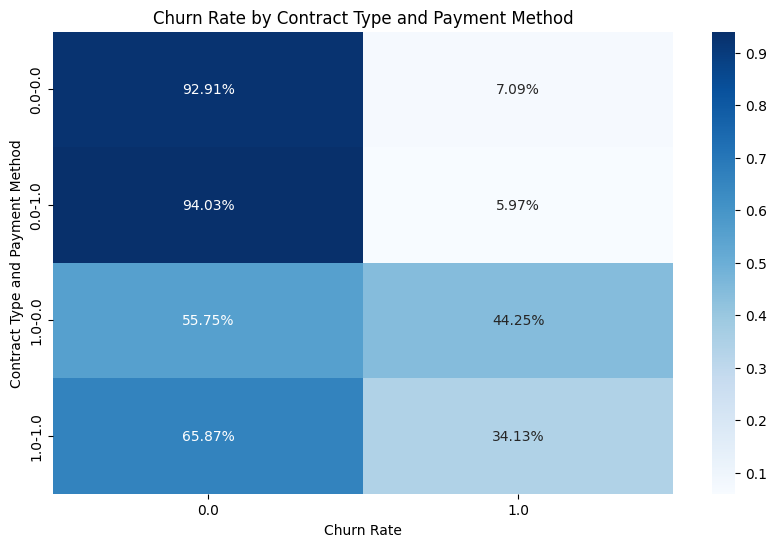

In [9]:
crosstab = pd.crosstab([df2['Contract_Month-to-month'], df2['PaymentMethod_Bank transfer (automatic)']], df2['Churn_Yes'], normalize='index')
print("Cross-tabulation of Contract MtoM and PaymentMethod Automatic Bank Transfer vs. Churn:")
print(crosstab)
#visualizing the crosstab -- could do more of these just a sample to discuss if useful
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='.2%', cmap='Blues')
plt.title('Churn Rate by Contract Type and Payment Method')
plt.xlabel('Churn Rate')
plt.ylabel('Contract Type and Payment Method')
plt.show()

#what the plot shows is that the churn rate is higher for month-to-month contracts and bank transfer payment method. 
# This suggests that customers on month-to-month contracts who pay via bank transfer are more likely to churn compared to those on other payment methods. 
# This could be due to the flexibility of month-to-month contracts, which may lead to less commitment from customers.


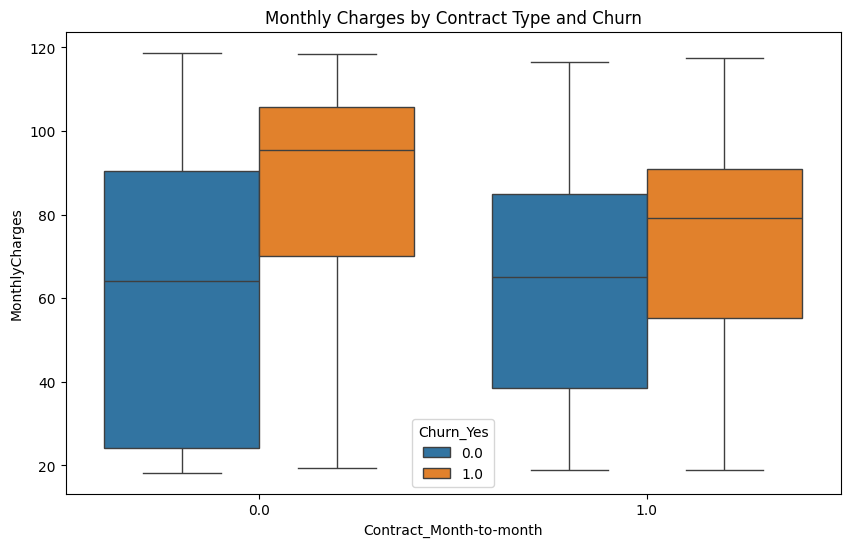

In [10]:
#COuld do many more of these for EDA but just to see if this is useful for us --- can discuss later
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract_Month-to-month', y='MonthlyCharges', hue='Churn_Yes', data=df2)
plt.title("Monthly Charges by Contract Type and Churn")
plt.show()

=== Basic Dataset Overview ===
Dataset Shape: (7043, 49)

Data Types:
customerID                                  object
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                                object
gender_Female                              float64
gender_Male                                float64
SeniorCitizen_0                            float64
SeniorCitizen_1                            float64
Partner_No                                 float64
Partner_Yes                                float64
Dependents_No                              float64
Dependents_Yes                             float64
PhoneService_No                            float64
PhoneService_Yes                           float64
MultipleLines_No                           float64
MultipleLines_No phone service             float64
MultipleLines_Yes                          float64
InternetService_DSL                        float64
InternetServ

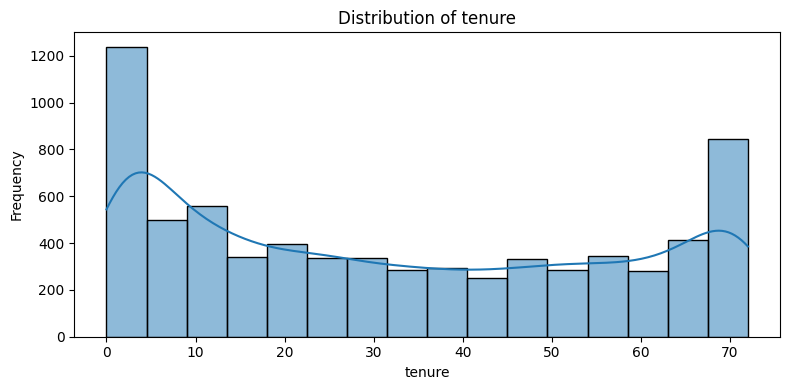

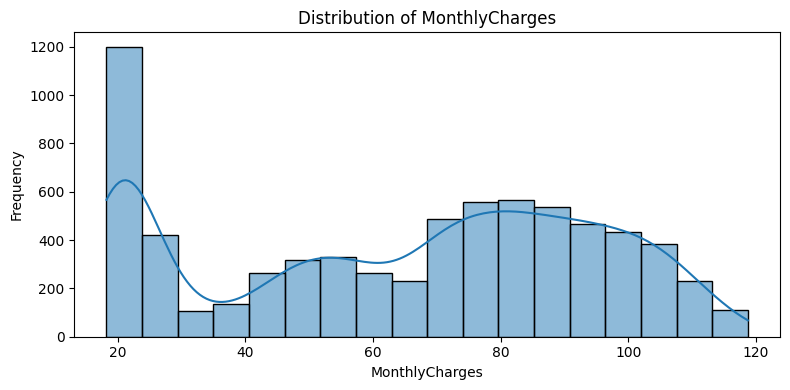


=== Correlation Heatmap ===


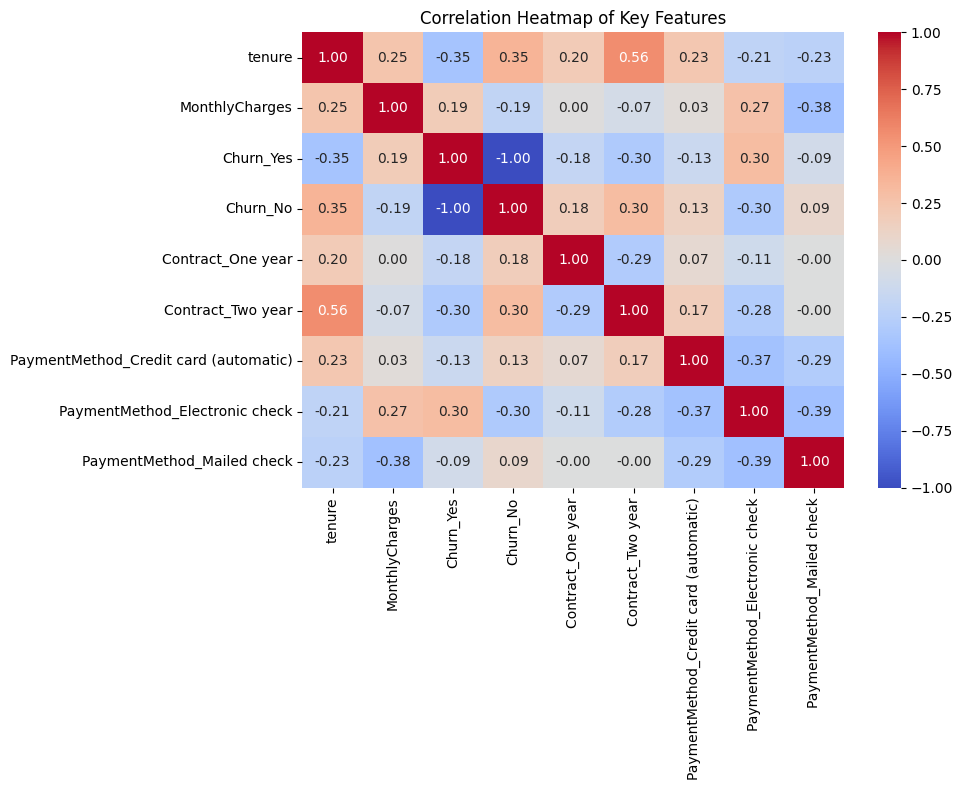

=== Basic Dataset Overview ===
Dataset Shape: (7043, 49)

Data Types:
customerID                                  object
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                                object
gender_Female                              float64
gender_Male                                float64
SeniorCitizen_0                            float64
SeniorCitizen_1                            float64
Partner_No                                 float64
Partner_Yes                                float64
Dependents_No                              float64
Dependents_Yes                             float64
PhoneService_No                            float64
PhoneService_Yes                           float64
MultipleLines_No                           float64
MultipleLines_No phone service             float64
MultipleLines_Yes                          float64
InternetService_DSL                        float64
InternetServ

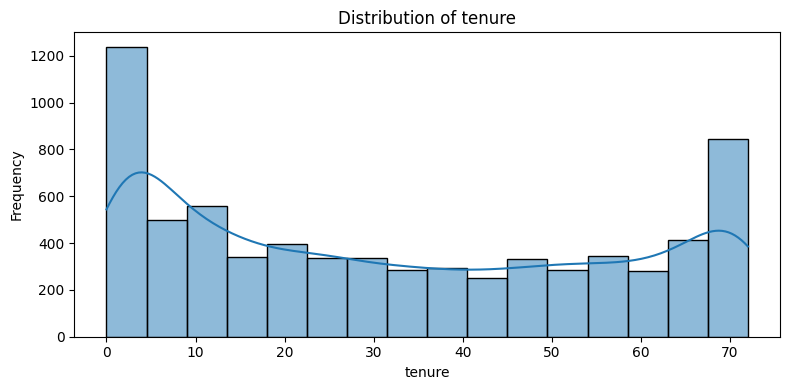

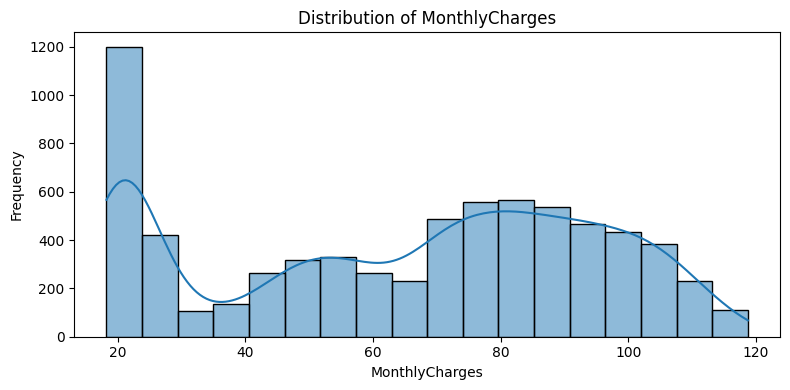

In [ ]:
# Function for Data Understanding
def data_understanding(df2):
    """Perform data understanding tasks: inspect data structure, missing values, distributions, and correlations."""
    
    # 1. Basic Dataset Overview
    print("=== Basic Dataset Overview ===")
    print("Dataset Shape:", df2.shape)
    print("\nData Types:")
    print(df2.dtypes)
    print("\nMissing Values per Column:")
    print(df2.isnull().sum())
    
    # 2. Descriptive Statistics for Numerical Features
    print("\n=== Descriptive Statistics For Numerical Features ===")
    print(df2.describe())
    
    # 3. Target Variable Distribution (using the one-hot encoded Churn columns)
    print("\n=== Churn Distribution ===")
    print("Counts:")
    churn_counts = pd.Series({
        "No": df2['Churn_No'].sum(),
        "Yes": df2['Churn_Yes'].sum()
    })
    print(churn_counts)
    print("\nNormalized:")
    print(churn_counts / churn_counts.sum())
    
    # 4. Visualizations
    
    # 4a. Histograms for Numerical Features
    print("\n=== Histograms for Numerical Features ===")
    numerical_cols = df2.select_dtypes(include=['int64', 'float64']).columns
    # Limit to a few important numerical columns to avoid too many plots
    important_num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    important_num_cols = [col for col in important_num_cols if col in numerical_cols]
    
    for col in important_num_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df2[col], kde=True)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()

data_understanding(df2)
print("\n=== Correlation Heatmap ===")
    # Selecting only numerical columns and limit to a reasonable number to avoid an overly cluttered heatmap
corr_cols = ['tenure', 'MonthlyCharges', 'Churn_Yes' , 'Churn_No', 'AvgCustomerRevenuePerMonth', 'TotalCustomerValue', 'Total_Yes_Services','Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
corr_cols = [col for col in corr_cols if col in df2.columns]
    
plt.figure(figsize=(10, 8))
corr_matrix = df2[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Key Features")
plt.tight_layout()
plt.show()

# Example usage:
if __name__ == "__main__":
    df2 = pd.read_csv("C:/Users/Zach/Documents/GitHub/TelecomsPredict/Data/telco_customer_churn_encoded.csv")
    data_understanding(df2)
